Cette première cellule vous présente la manière avec laquelle j'ai obtenu les features/caractéristiques à partir des jeux de données de "textes"
Pour obtenir les textes (et les "filtrer") j'ai utiliser le script ./textDatasets/conversion.sh (qui prends, par exemple les fichiers FR_* les concatene, supprime les accents (en gardant les caracteres sans accents) et enfin transforme en minuscules).
J'ai utilisé les livres "open data" de la base du site Guttenberg Project (qui archive énormément de livres en texte, "txt" simples", tombés dans le domaine publique).

In [1]:
import numpy as np
import string
BlockSz=1000

# On procede de la même façon pour les differents languages
# Ouverture du fichier texte contenant les caracteres alphabetiques "brutes"
textGERMAN = open('./textDatasets/GERMAN')
# Lecture
DE=textGERMAN.read()
textGERMAN.close()
# Calcule du nombre de blocks (arrondi par defaut) de BlockSz caracteres
NbBlock=int(np.floor(len(DE)/BlockSz))
# Creation des tableaux de donnees textuelles et de features
DataDE=[]
FeaDE =[]
# Pour tous les indices de blocks ...
for index in range(NbBlock):
    # Exctraction des donnees texte du block
    DataDE.append(DE[index*BlockSz:(index+1)*BlockSz])
    # Comptage de chacun des caracteres
    countDE=[]
    for letter in string.ascii_lowercase:
        countDE.append(DataDE[index].count(letter))
    # Comptage de toutes les 26**2 paires de caracteres possibles
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countDE.append(DataDE[index].count(letter1+letter2))
    # Une fois le vecteur de décompte obtenu  .... on ajoute ce vecteur (contenant tous les decomptes) au tableaux des features
    FeaDE.append(countDE)

# On procede de la même façon pour les differents languages ....
textFRENCH = open('./textDatasets/FRENCH')
FR=textFRENCH.read()
textFRENCH.close()
NbBlock=int(np.floor(len(FR)/BlockSz))
DataFR=[]
FeaFR =[]
for index in range(NbBlock):
    DataFR.append(FR[index*BlockSz:(index+1)*BlockSz])
    countFR=[]
    for letter in string.ascii_lowercase:
        countFR.append(DataFR[index].count(letter))
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countFR.append(DataFR[index].count(letter1+letter2))
    FeaFR.append(countFR)

# On procede de la même façon pour les differents languages ....
textSPANISH = open('./textDatasets/SPANISH')
ES=textSPANISH.read()
textSPANISH.close()
NbBlock=int(np.floor(len(ES)/BlockSz))
DataES=[]
FeaES =[]
for index in range(NbBlock):
    DataES.append(ES[index*BlockSz:(index+1)*BlockSz])
    countES=[]
    for letter in string.ascii_lowercase:
        countES.append(DataES[index].count(letter))
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countES.append(DataES[index].count(letter1+letter2))
    FeaES.append(countES)

# On procede de la même façon pour les differents languages ....
textENGLISH = open('./textDatasets/ENGLISH')
EN=textENGLISH.read()
textENGLISH.close()
NbBlock=int(np.floor(len(EN)/BlockSz))
DataEN=[]
FeaEN =[]
for index in range(NbBlock):
    DataEN.append(EN[index*BlockSz:(index+1)*BlockSz])
    countEN=[]
    for letter in string.ascii_lowercase:
        countEN.append(DataEN[index].count(letter))
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countEN.append(DataEN[index].count(letter1+letter2))
    FeaEN.append(countEN)

In [2]:
# Ici on sauvegarde les caracteristiques, pour eviter de les recalculer à chaque fois ....
np.save('./FeaEN.npy', FeaEN)
np.save('./FeaFR', FeaFR)
np.save('./FeaDE', FeaDE)
np.save('./FeaES', FeaES)

In [3]:
# ... On peut simplement les loader (et commenter les cellules precedentes)
FeaEN = np.load('./FeaEN.npy')
FeaFR = np.load('./FeaFR.npy')
FeaDE = np.load('./FeaDE.npy')
FeaES = np.load('./FeaES.npy')

In [4]:
# Pour plus de "facilier de manipulation" on trasforme les donnes en "matrice numpy" et on affiche la dimension de la base de donnees.
FeaDE = np.array(FeaDE)
print(FeaDE.shape)

FeaFR = np.array(FeaFR)
print(FeaFR.shape)

FeaES = np.array(FeaES)
print(FeaES.shape)

FeaEN = np.array(FeaEN)
print(FeaEN.shape)

(4329, 702)
(4116, 702)
(4321, 702)
(4209, 702)


## Questions:
* 1) Réaliser une classification binaire en utilisant les méthodes linéaires suivantes: regression "ridge", LASSO et SVM (sans noyau !).
 * Pour ces méthodes vous devez faire une recherche du meilleur paramètre de régularisation ;
 * Vous devrez égalemement selectionner les deux languages de votre choix

In [17]:
import numpy as np
import pandas as pd

#On construit un dataset avec toutes les langues
X=pd.DataFrame(np.concatenate((FeaDE,FeaFR, FeaES,FeaEN), axis=0))

#On crée une base pour construire le vecteur y en fonction de la langue à prédire
langues=["DE","FR","ES","EN"]
Size={}

Size["DE"]=FeaDE.shape[0]
Size["FR"]=FeaFR.shape[0]
Size["ES"]=FeaES.shape[0]
Size["EN"]=FeaEN.shape[0]

def y_building(target,lang):
    if target==lang:
        y=np.ones(Size[target])
    else:
        y=np.zeros(Size[lang])
    return y

In [6]:
#On choisit la langue allemande et on construit le vecteur y
y=[]
target="FR"
for l in langues:
    y.append(y_building(target,l))

y=pd.Series(np.concatenate(y, axis=0))

#On split le dataset (permet également de shuffle)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#On entraine 2 modèles avec Gridsearch et une validation croisée sur 3 plis
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model1 = LogisticRegression(penalty='l1')
grid_values1 = {'C': [10, 100]}
grid1 = GridSearchCV(model1, param_grid = grid_values1, scoring = 'accuracy',cv=3).fit(X_train, y_train)
print("Ridge Classification: ",target," bestparam=",grid1.best_params_)
print("Accuracy sur le train:",round(grid1.score(X_train,y_train),3),"\n","Accuracy sur le test:",round(grid1.score(X_test,y_test),3),"\n")

model2 = LogisticRegression(penalty='l2')
grid_values2 = {'C': [0.001, 0.01]}
grid2 = GridSearchCV(model2, param_grid = grid_values2, scoring = 'accuracy', cv=3).fit(X_train, y_train)
print("\n","Lasso Classification: ",target," bestparam=",grid2.best_params_)
print("Accuracy sur le train:",round(grid2.score(X_train,y_train),3),"\n","Accuracy sur le test:",round(grid2.score(X_test,y_test),3),"\n")

C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

Ridge Classification:  FR  bestparam= {'C': 10}
Accuracy sur le train: 1.0 
 Accuracy sur le test: 1.0 



C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec


 Lasso Classification:  FR  bestparam= {'C': 0.01}
Accuracy sur le train: 1.0 
 Accuracy sur le test: 1.0 



In [9]:
confusion_matrix(y_test, grid1.predict(X_test))

array([[3213,    2],
       [   0, 1029]], dtype=int64)

In [10]:
confusion_matrix(y_test, grid2.predict(X_test))

array([[3214,    1],
       [   0, 1029]], dtype=int64)

A travers cette première analyse en one VS all, on observe après avoir testé toutes les langues que les modèles de lasso et de ridge affichent d'excellente performances. <br> On peut expliquer cela par le fait que la fréquence des lettres dans un corpus de texte permet de déterminer la langue du texte avec une grande précision. Chaque langue emploie des lettres dans une quantité qui lui sont très spécifiques. <br>Il suffit donc de 1000 lettres d'un corpus de texte pour déterminer sa langue par rapport aux trois autres langues choisies.

## Questions:
* 2) Réaliser une classification binaire avec l'une des méthodes linéaire précédent en utilisant la réduction de dimension (ACP par exemple, ou une autre méthode)

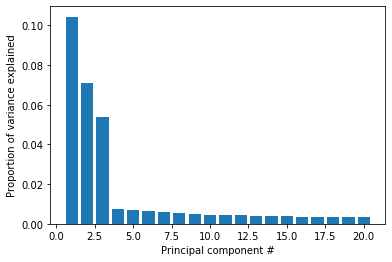

In [26]:
#On applique un PCA sur le dataset
X=pd.DataFrame(np.concatenate((FeaDE,FeaFR, FeaES,FeaEN), axis=0))

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_normalized = StandardScaler().fit(X).transform(X)  
pca=PCA(20).fit(X_normalized)

import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.show()


On constate que les trois principaux composants permettent d'expliquer environ 23% de la variance à eux seuls. Essayons de ramener le problèmes à 3 variables

In [27]:
X_pca = PCA(n_components = 3).fit_transform(X_normalized)

#On construit y
target="EN"
y=[]
for l in langues:
    y.append(y_building(target,l))

y=pd.Series(np.concatenate(y, axis=0))

#On split le dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=0)

#On entraine le modèle de ridge
model1 = LogisticRegression(penalty='l1')
grid_values1 = {'C': [10, 100]}
grid1 = GridSearchCV(model1, param_grid = grid_values1, scoring = 'accuracy',cv=3).fit(X_train, y_train)
print("Ridge Classification: ",target," bestparam=",grid1.best_params_)
print("Accuracy sur le train:",round(grid1.score(X_train,y_train),3),"\n","Accuracy sur le test:",round(grid1.score(X_test,y_test),3),"\n")

Ridge Classification:  EN  bestparam= {'C': 100}
Accuracy sur le train: 1.0 
 Accuracy sur le test: 1.0 



C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

Le PCA a permis de ramener le problème à seulement 3 variables. On constate toujours des performances excellentes de prédiction. On peut interpréter ce résultat par le fait qu'il suffit de connaitres la fréquence d'un nombre limité de lettres pour caractériser une langue par rapport aux trois autres choisis.

## Questions:
* 4. Réaliser une classification binaire en utilisant les SVM à noyau (comparer les performances obtenus avec un noyau Gaussien (rbf) et un noyau polynomial

In [15]:
X=pd.DataFrame(np.concatenate((FeaDE,FeaFR, FeaES,FeaEN), axis=0))

#On construit y
target="EN"
y=[]
for l in langues:
    y.append(y_building(target,l))

y=pd.Series(np.concatenate(y, axis=0))

#On split le dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
from sklearn.svm import SVC
model3= SVC()
grid_values3 = {'C': [0.001,100], 'kernel':['rbf','poly']}
grid3 = GridSearchCV(model3, param_grid = grid_values3, scoring = 'accuracy', cv=3).fit(X_train, y_train)

C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\svm\base

In [10]:
grid3.cv_results_

{'mean_fit_time': array([34.13014738,  0.60501448, 85.1438694 ,  0.53874644]),
 'std_fit_time': array([0.41862885, 0.09421326, 1.80388605, 0.05027894]),
 'mean_score_time': array([16.62551832,  0.1936082 , 24.89261564,  0.18968956]),
 'std_score_time': array([0.79859121, 0.00908423, 0.84305415, 0.01014089]),
 'param_C': masked_array(data=[0.001, 0.001, 100, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'poly', 'rbf', 'poly'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001, 'kernel': 'rbf'},
  {'C': 0.001, 'kernel': 'poly'},
  {'C': 100, 'kernel': 'rbf'},
  {'C': 100, 'kernel': 'poly'}],
 'split0_test_score': array([0.75306315, 1.        , 0.94392083, 1.        ]),
 'split1_test_score': array([0.75306315, 1.        , 0.94509896, 1.        ]),
 'split2_test_score': array([0.75324063, 1.        , 0.94485034, 1

In [16]:
modeltuned=SVC(kernel="poly")
modeltuned=modeltuned.fit(X_train,y_train)
print("Accuracy sur le train:",round(modeltuned.score(X_train,y_train),3),"\n","Accuracy sur le test:",round(modeltuned.score(X_test,y_test),3))

C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy sur le train: 1.0 
 Accuracy sur le test: 1.0


Le SVM avec noyau polynomial offre des performances comparables à la regression logistique précédente

## Questions:
* 5. Sur la base des résultats précédents, quelle est la méthode linéaire la plus adaptée à ce problème de classification


Compte tenu de la simplicité du problème (seule la fréquence de quelques lettres permet de caractériser une langue par rapport à trois autres), il apparait que le modèle le plus adaptée est la régression logistique Ridge.

## Questions:
* 6. Enfin, mettre en place une méthode (de votre choix) de classification multi-classe;
 * Donner la matrice de confusion et indiquer les languages les plus difficile à distinguer.

In [40]:
X=pd.DataFrame(np.concatenate((FeaDE,FeaFR, FeaES,FeaEN), axis=0))

#On construit y avec des classes allant de 1 à 4

y1=np.zeros(languages["DE"])
y2=np.zeros(languages["FR"])+1
y3=np.zeros(languages["ES"])+2
y4=np.zeros(languages["EN"])+3

y=pd.Series(np.concatenate((y1,y2,y3,y4), axis=0))

#On split le dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [41]:
from sklearn.metrics import accuracy_score
model4 = LogisticRegression(penalty='l2',C=10, multi_class='ovr', solver="lbfgs").fit(X_train,y_train)
ypredtrain=model4.predict(X_train)
ypredtest=model4.predict(X_test)
print("Accuracy sur le train:",round(accuracy_score(y_train,ypredtrain),3),"\n","Accuracy sur le test:",round(accuracy_score(y_test,ypredtest),3),"\n")

C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy sur le train: 1.0 
 Accuracy sur le test: 1.0 



C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [42]:
#Matrice de confusion
result=pd.DataFrame(confusion_matrix(y_test, grid2.predict(X_test)), columns=languages)
result=result.set_index(result.columns)
result

,DE,FR,ES,EN
DE,1056,1,0,0
FR,0,1029,0,0
ES,1092,0,0,0
EN,1066,0,0,0


La matrice de confusion bugge comme on peut le voir. Elle affiche néanmoins une seule erreur.

C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


training score : 0.999 (multinomial)


C:\Users\bigdata\DS\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


training score : 0.997 (ovr)


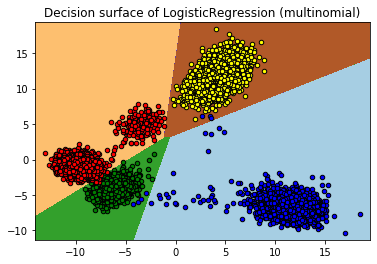

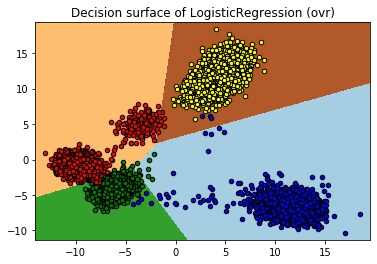

In [61]:
#Plot des limites de décisions pour une regression logistique multinomiale et one vs all
#On ramène le problème à 2 dimensions avec le PCA

X_normalized = StandardScaler().fit(X).transform(X)  
X_pca = PCA(n_components = 2).fit_transform(X_normalized)

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X_pca, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X_pca, y), multi_class))

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = ["blue","green","red","yellow"]
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X_pca[idx, 0], X_pca[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

plt.show()

Légende: Bleu=DE vert=FR rouge=ES jaune=EN

On observe que les langues les plus difficiles à distinguer sont le Français et l'Espagnole. L'allemand en bleu est la langue qui se distingue le plus des autres.

La regression multinomiale semble plus adaptée au problème, les frontières de décisions sont mieux définies